## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [2]:
dir = ['../input/chest-xray-pneumonia/chest_xray/train',
       '../input/chest-xray-pneumonia/chest_xray/test',
       '../input/chest-xray-pneumonia/chest_xray/val']
categories = ['NORMAL', 'PNEUMONIA']
data= []
feature = []
def make_data(direc):
    for category in categories:
        path = os.path.join(direc, category)
        label = categories.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (224,224))
            feature = np.array(image, dtype=np.float64)
            data.append([feature, label])
            
    return data

In [3]:
def loaddata(direc):
    data = make_data(direc)
    np.random.shuffle(data)
    feature = []
    labels = []
    for img,label in data:
        feature.append(img)
        labels.append(label)

    x = np.array(feature, dtype=np.float64)
    y = np.array(labels)
    return x,y

In [4]:
x_train, y_train = loaddata(dir[0])
# test_data = make_data(dir[1])
# val_data = make_data(dir[2])

In [5]:
# np.random.shuffle(train_data)
# x_train = train_data[0]
# y_train = train_data[1]

# np.random.shuffle(test_data)
# x_test = test_data[0]
# y_test = test_data[1]

# np.random.shuffle(val_data)
# x_val = val_data[0]
# y_val = val_data[1]

In [6]:
input_layer = tf.keras.Input([224,224,1])

conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='Same',
                               activation='relu')(input_layer)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                               activation='relu')(pool1)
            
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same',
                               activation='relu')(pool2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)

flt1 =tf.keras.layers.Flatten()(pool3)

dn1 = tf.keras.layers.Dense(513, activation='relu')(flt1)

out = tf.keras.layers.Dense(32, activation='softmax')(dn1)

2022-01-19 13:51:26.842364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 13:51:26.938436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 13:51:26.939178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 13:51:26.940358: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model = tf.keras.Model(input_layer, out)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, batch_size=100, epochs=10)  #, validation_data=(x_val, y_val)

2022-01-19 13:51:29.850919: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1046872064 exceeds 10% of free system memory.
2022-01-19 13:51:30.922978: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1046872064 exceeds 10% of free system memory.
2022-01-19 13:51:31.708068: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-01-19 13:51:32.999597: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


53/53 [==============================] - 12s 81ms/step - loss: 20.0130 - accuracy: 0.8526
Epoch 2/10
53/53 [==============================] - 4s 77ms/step - loss: 0.1147 - accuracy: 0.9609
Epoch 3/10
53/53 [==============================] - 4s 78ms/step - loss: 0.1033 - accuracy: 0.9630
Epoch 4/10
53/53 [==============================] - 4s 78ms/step - loss: 0.0574 - accuracy: 0.9781
Epoch 5/10
53/53 [==============================] - 4s 77ms/step - loss: 0.0376 - accuracy: 0.9858
Epoch 6/10
53/53 [==============================] - 4s 78ms/step - loss: 0.0176 - accuracy: 0.9954
Epoch 7/10
53/53 [==============================] - 4s 78ms/step - loss: 0.0090 - accuracy: 0.9979
Epoch 8/10
53/53 [==============================] - 4s 77ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 9/10
53/53 [==============================] - 4s 78ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 10/10
53/53 [==============================] - 4s 78ms/step - loss: 0.0010 - accuracy: 1.0000


In [10]:
x_test, y_test = loaddata(dir[1])

In [11]:
model.evaluate(x_test, y_test, verbose=1)

2022-01-19 13:52:36.369554: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1172111360 exceeds 10% of free system memory.
2022-01-19 13:52:37.704673: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1172111360 exceeds 10% of free system memory.


183/183 [==============================] - 3s 13ms/step - loss: 0.3544 - accuracy: 0.9692


[0.35444486141204834, 0.9691780805587769]

2022-01-19 13:52:42.663069: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1172111360 exceeds 10% of free system memory.


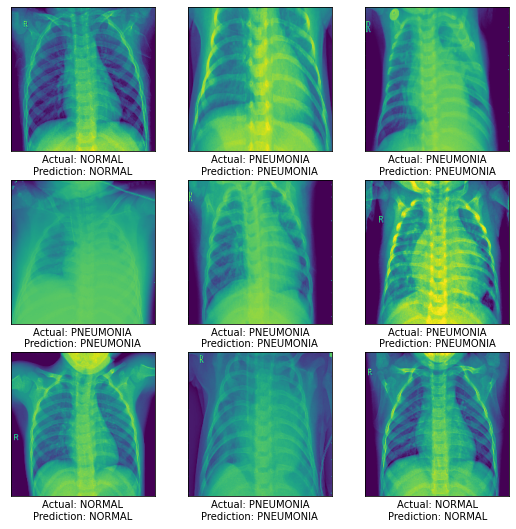

In [12]:
predict = model.predict(x_test)

plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i])
  plt.xlabel("Actual: "+categories[y_test[i]]+"\nPrediction: "+
    categories[np.argmax(predict[i])])
  plt.xticks([])
  plt.yticks([])